In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive

In [56]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [57]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Gen RAM Free: 8.4 GB  | Proc size: 5.1 GB
GPU RAM Free: 755MB | Used: 15525MB | Util  95% | Total 16280MB


In [58]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Importing the libraries


In [0]:
from tensorflow.python.keras.preprocessing.image import load_img
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing.image import img_to_array
from keras_preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import utils as np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

import numpy as np
import keras
import os
import imghdr
import glob
import tensorflow as tf

# 2 .Loading The Dataset



In [0]:
path = ["/content/drive/My Drive/BigDataProject/Resized Dataset/Aj/*.jpg",
        "/content/drive/My Drive/BigDataProject/Resized Dataset/Ami/*.jpg",
        "/content/drive/My Drive/BigDataProject/Resized Dataset/Bondhu/*.jpg",
        "/content/drive/My Drive/BigDataProject/Resized Dataset/Onurodh/*.jpg",
        "/content/drive/My Drive/BigDataProject/Dataset/কাশি/*.jpg",
        "/content/drive/My Drive/BigDataProject/Dataset/খাওয়া/*.jpg",
        "/content/drive/My Drive/BigDataProject/Dataset/বাঁধা দেওয়া/*.jpg",
        "/content/drive/My Drive/BigDataProject/Dataset/সময়/*.jpg"]

In [61]:
len(path)

8

In [62]:
label_names = ['Aj','Ami','Bondhu','Onurodh','Kashi','Khawa','Badha_Dewa','Somoi']
len(label_names)

8

# 3. Processing Train set and Val set


In [0]:
images_dataset =[]
labels_dataset = []
images = []
i=0
for p in path:
  for filename in glob.glob(p):
    im=Image.open(filename)
    image = load_img(filename,target_size=(224, 224))
    image = img_to_array(image)
    # reshape data for the model
    
    
    labels_dataset.append(i)
    image = preprocess_input(image)
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    images_dataset.append(image)
    # images.append(image)
  i = i+1

In [64]:
print(len(images_dataset))
print((len(labels_dataset))) 

805
805


In [0]:
Y = np_utils.to_categorical(labels_dataset, 8)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(images_dataset, Y, test_size=0.1, random_state=42)

In [67]:
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# 4. Building the Model





In [0]:
#model = VGG16()
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=8, activation="softmax"))

In [0]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=128,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(8, activation='softmax'))


In [76]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_70 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 56, 56, 256)     

In [0]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [0]:
# Directory where the checkpoints will be saved
# checkpoint_dir = '/content/drive/My Drive/BigDataProject/trainingcheckpoints'
# # Name of the checkpoint files
# checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")


In [0]:
# checkpoint = ModelCheckpoint(filepath=checkpoint_prefix, 
#                              monitor='val_acc', 
#                              verbose=1, save_best_only=False, save_weights_only=False,
#                              mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


In [80]:
his= model.fit(x=np.array(X_train), y=np.array(y_train), batch_size=16, epochs=50, verbose=1,validation_split=0.1, shuffle=True )

Train on 651 samples, validate on 73 samples
Epoch 1/50
651/651 [==============================] - 4s 7ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 1.1045 - val_accuracy: 0.8493
Epoch 2/50
651/651 [==============================] - 4s 7ms/step - loss: 0.0830 - accuracy: 0.9785 - val_loss: 0.7351 - val_accuracy: 0.7945
Epoch 3/50
651/651 [==============================] - 4s 7ms/step - loss: 0.0842 - accuracy: 0.9708 - val_loss: 0.5443 - val_accuracy: 0.8630
Epoch 4/50
651/651 [==============================] - 4s 7ms/step - loss: 0.0731 - accuracy: 0.9770 - val_loss: 0.4600 - val_accuracy: 0.8356
Epoch 5/50
651/651 [==============================] - 4s 7ms/step - loss: 0.0431 - accuracy: 0.9908 - val_loss: 0.5375 - val_accuracy: 0.8493
Epoch 6/50
651/651 [==============================] - 4s 7ms/step - loss: 0.0489 - accuracy: 0.9939 - val_loss: 0.4142 - val_accuracy: 0.9041
Epoch 7/50
651/651 [==============================] - 4s 7ms/step - loss: 0.0027 - accuracy: 0.9985 - v

In [0]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# model.save("model1.h5")
# print("Saved model to disk")

# 4. Checking the loss and Accuracy


In [81]:
print(his.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


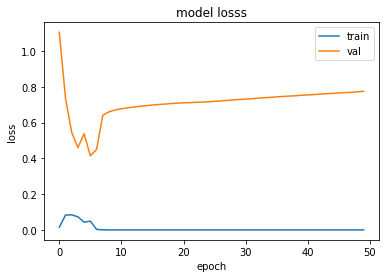

In [82]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('model losss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('/content/drive/My Drive/BigDataProject/loss2.png')
plt.show()


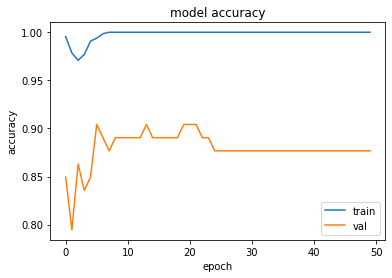

In [83]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('/content/drive/My Drive/BigDataProject/accuracy2.png')
plt.show()

# 4. Predicting Image



In [0]:
yhat = model.predict(np.array(X_test))

In [85]:
len(yhat)

81

In [0]:
output = []
actual_output = []
c=0
for i in yhat:
  output.append(np.argmax(i))
  temp = y_test[c]
  c=c+1
  actual_output.append(np.argmax(temp))


In [87]:
from sklearn.metrics import accuracy_score
accuracy_score(actual_output, output)

0.9506172839506173

In [0]:
# import pickle
# Pkl_Filename = "Pickle_RL_Model.pkl"  

# with open(Pkl_Filename, 'wb') as file:  
#     pickle.dump(model, file)

#5 . VGG16 Model


In [0]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=8, activation="softmax"))

In [89]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 56, 56, 256)     

In [0]:
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [91]:
his= model.fit(x=np.array(X_train), y=np.array(y_train), batch_size=16, epochs=50, callbacks=[early],verbose=1,validation_split=0.1, shuffle=True )

Train on 651 samples, validate on 73 samples
Epoch 1/50
651/651 [==============================] - 6s 9ms/step - loss: 8.0086 - accuracy: 0.0937 - val_loss: 2.0789 - val_accuracy: 0.1507
Epoch 2/50
 16/651 [..............................] - ETA: 4s - loss: 2.0853 - accuracy: 0.0625

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


651/651 [==============================] - 5s 8ms/step - loss: 2.0808 - accuracy: 0.1060 - val_loss: 2.0803 - val_accuracy: 0.1507
Epoch 3/50
651/651 [==============================] - 5s 8ms/step - loss: 2.0798 - accuracy: 0.1167 - val_loss: 2.0812 - val_accuracy: 0.1096
Epoch 4/50
651/651 [==============================] - 5s 8ms/step - loss: 2.0792 - accuracy: 0.1167 - val_loss: 2.0816 - val_accuracy: 0.1507
Epoch 5/50
651/651 [==============================] - 5s 8ms/step - loss: 2.0794 - accuracy: 0.1306 - val_loss: 2.0817 - val_accuracy: 0.1370
Epoch 6/50
651/651 [==============================] - 5s 8ms/step - loss: 2.0793 - accuracy: 0.1260 - val_loss: 2.0826 - val_accuracy: 0.1507
Epoch 7/50
651/651 [==============================] - 5s 8ms/step - loss: 2.0793 - accuracy: 0.1275 - val_loss: 2.0824 - val_accuracy: 0.1507
Epoch 8/50
651/651 [==============================] - 5s 8ms/step - loss: 2.0876 - accuracy: 0.1091 - val_loss: 2.0923 - val_accuracy: 0.1507
Epoch 9/50
651/65

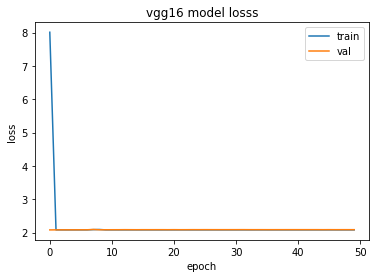

In [92]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('vgg16 model losss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('/content/drive/My Drive/BigDataProject/lossvgg16.png')
plt.show()

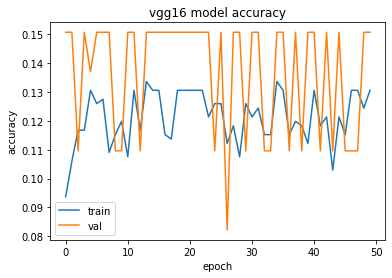

In [93]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('vgg16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('/content/drive/My Drive/BigDataProject/accuracyvgg16.png')
plt.show()

In [0]:
yhat = model.predict(np.array(X_test))

In [95]:
len(yhat)

81

In [0]:
output = []
actual_output = []
c=0
for i in yhat:
  output.append(np.argmax(i))
  temp = y_test[c]
  c=c+1
  actual_output.append(np.argmax(temp))

In [97]:
accuracy_score(actual_output, output)

0.04938271604938271